# DAT 402 Project 1

For this Project, we chose to use the "Loan Approval Classification Dataset" from Kaggle. (https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data.) The goal of this project is to correctly classify if a person will be approved for a loan based on certain criteria. We also aim to predict the most important criteria for predicting the outcome of a person's loan application.

This raw dataset contains 14 unique features and 45,000 records.

### Importing Libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import train_test_split, GridSearchCV

In [44]:
labelEncoder = LabelEncoder()
ohEncoder = OneHotEncoder()

### Importing Dataset

In [45]:
url = "https://raw.githubusercontent.com/ProntoSbinalla/DAT-402-Project-1/main/loan_data.csv"

data = pd.read_csv(url)

data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [46]:
display(data['person_education'].value_counts())
display(data['person_home_ownership'].value_counts())
display(data['loan_intent'].value_counts())

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

### Data Cleaning

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [48]:
data.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

### EDA

#### Graphing Data

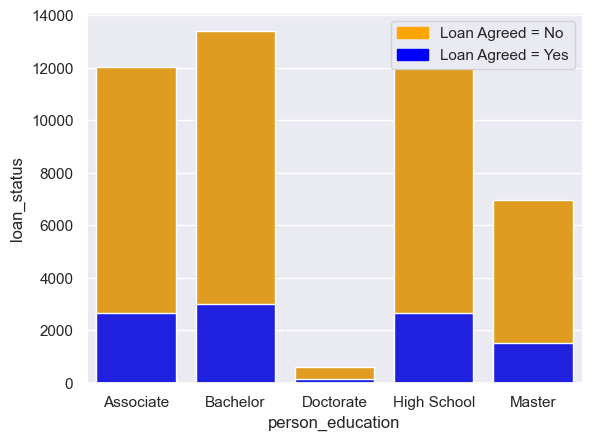

In [49]:
total = data.groupby('person_education')['loan_status'].count().reset_index()

bar1 = sns.barplot(x="person_education",  y="loan_status", data=total, color='orange')

loan = data[data.loan_status == 1]

bar2 = sns.barplot(x="person_education", y="loan_status", data=loan, estimator=sum, color='blue')

top_bar = mpatches.Patch(color='orange', label='Loan Agreed = No')
bottom_bar = mpatches.Patch(color='blue', label='Loan Agreed = Yes')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()


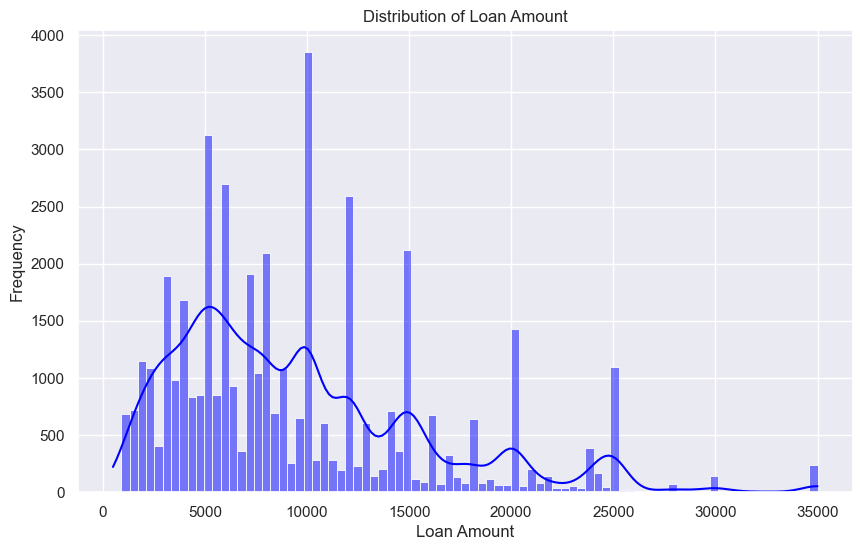

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(data['loan_amnt'], kde=True, color='blue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

C:\Users\mesha\AppData\Local\Temp\ipykernel_100296\2809599006.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='person_education', y='loan_amnt', data=data, palette='viridis')


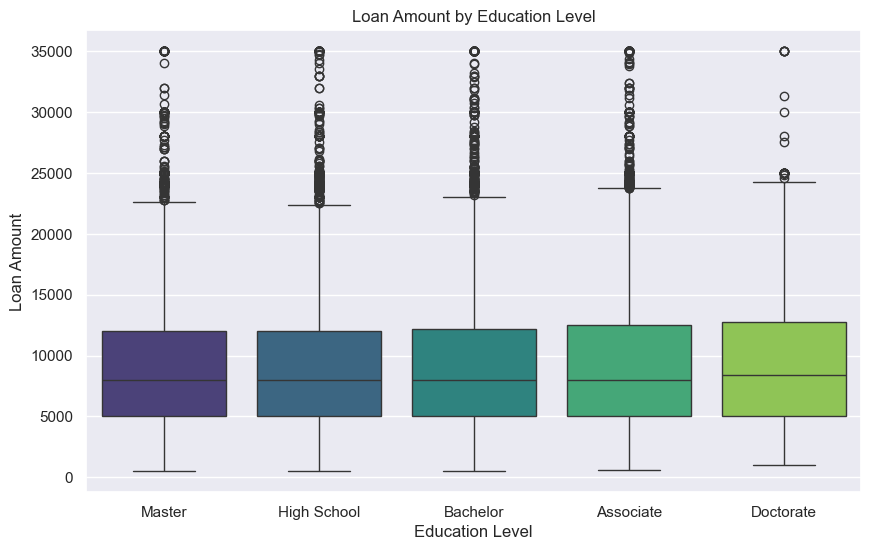

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='person_education', y='loan_amnt', data=data, palette='viridis')
plt.title('Loan Amount by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Loan Amount')
plt.show()

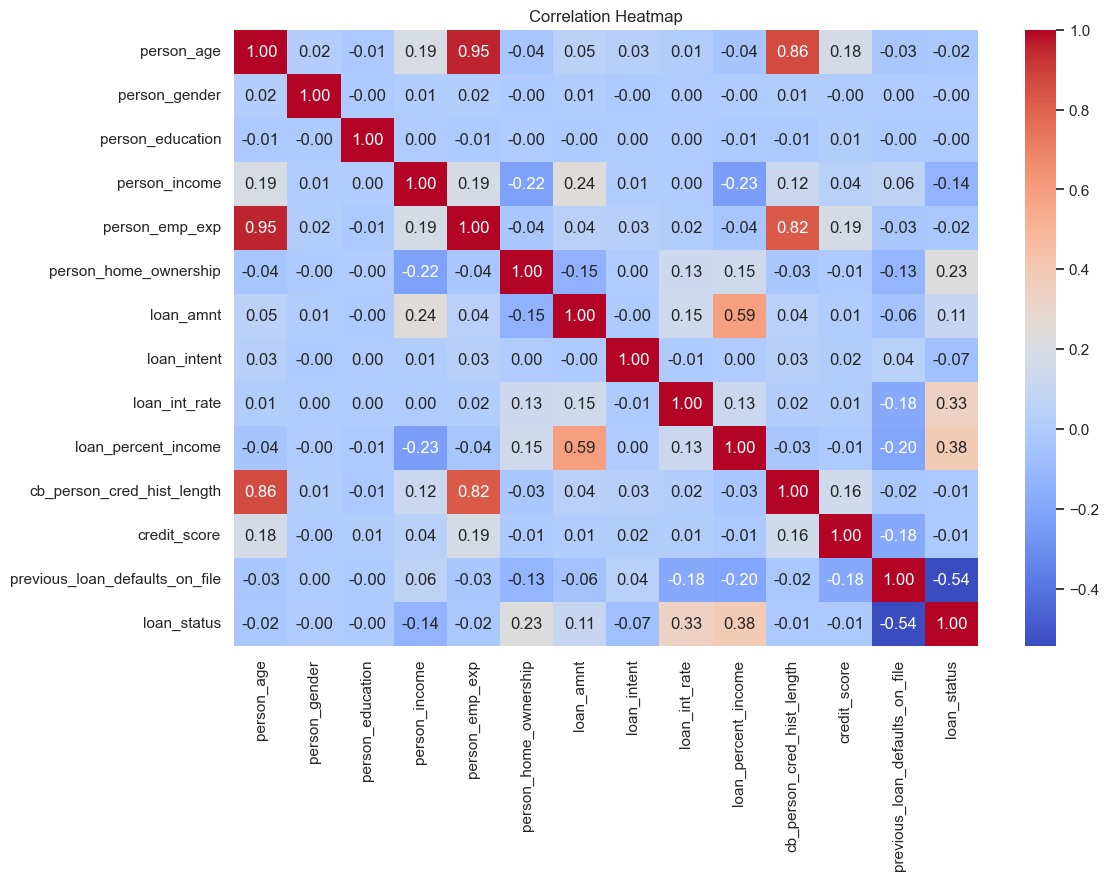

In [52]:
# Encode categorical columns
labelEncoder = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = labelEncoder.fit_transform(data[col])

# Compute correlation matrix for numeric columns only
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

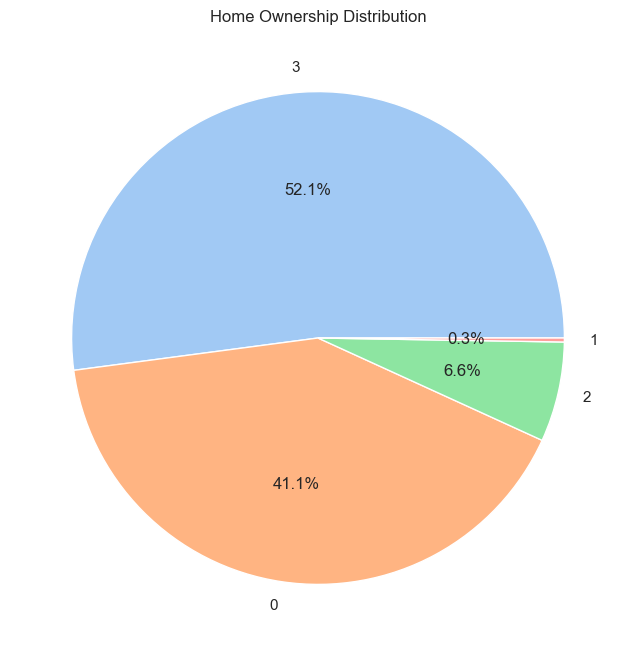

In [53]:
plt.figure(figsize=(8, 8))
data['person_home_ownership'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Home Ownership Distribution')
plt.ylabel('')
plt.show()

C:\Users\mesha\AppData\Local\Temp\ipykernel_100296\2469705495.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='person_home_ownership', y='loan_amnt', data=data, palette='Set3')


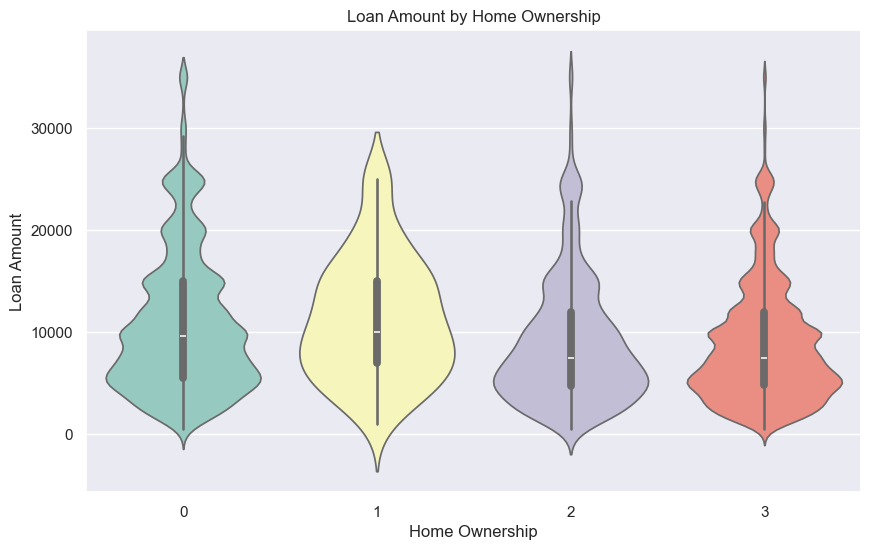

In [54]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='person_home_ownership', y='loan_amnt', data=data, palette='Set3')
plt.title('Loan Amount by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Loan Amount')
plt.show()

#### Encoding Variables

In [55]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = labelEncoder.fit_transform(data[col])

In [56]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1


### Variable Selection

In [57]:
X = data.drop(columns=['loan_status'])
y = data['loan_status']

display(X.head())

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0


### Decision-Tree Model

#### Train-Test Split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decisionTree = DecisionTreeClassifier(random_state=42)

decisionTree.fit(X_train, y_train)
y_pred = decisionTree.predict(X_test)

training_accuracy = decisionTree.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred)

print("Training Accuracy: ", training_accuracy)
print("Test Accuracy: ", test_accuracy)

Training Accuracy:  1.0
Test Accuracy:  0.8981111111111111


In [59]:
depth, training, testing = [], [], []

for i in range(1, 30):
    decisionTree = DecisionTreeClassifier(max_depth=i, random_state=42)
    decisionTree.fit(X_train, y_train)
    training.append(decisionTree.score(X_train, y_train))
    testing.append(decisionTree.score(X_test, y_test))
    depth.append(i)
    
decisionTreeDF = pd.DataFrame({"Depth": depth, "Training Accuracy": training, "Testing Accuracy": testing})

decisionTreeDF

,Depth,Training Accuracy,Testing Accuracy
0,1,0.778056,0.776667
1,2,0.852389,0.848111
2,3,0.895944,0.893222
3,4,0.909861,0.908556
4,5,0.914222,0.912556
5,6,0.918139,0.913111
6,7,0.920750,0.914111
7,8,0.923556,0.915778
8,9,0.926250,0.916333
9,10,0.930833,0.914000


In [60]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': decisionTree.feature_importances_
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance

,Feature,Importance
0,previous_loan_defaults_on_file,0.294490
1,loan_int_rate,0.166913
2,loan_percent_income,0.156341
3,person_income,0.133675
4,credit_score,0.057102
5,person_home_ownership,0.042764
6,loan_intent,0.035837
7,loan_amnt,0.032581
8,person_age,0.021550
9,person_emp_exp,0.020015


Text(0, 0.5, 'Accuracy Score')

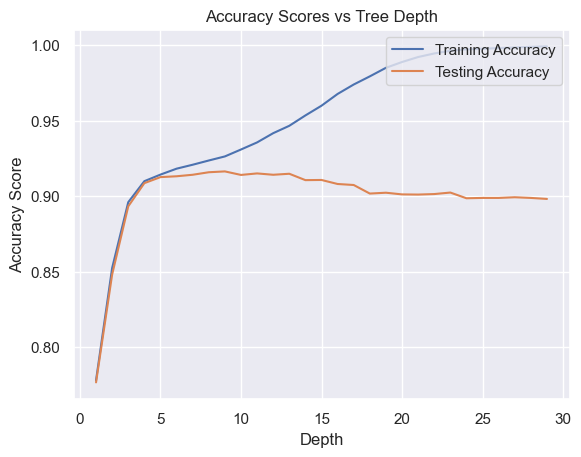

In [61]:
plt.plot(decisionTreeDF['Depth'], decisionTreeDF['Training Accuracy'], label='Training Accuracy')
plt.plot(decisionTreeDF['Depth'], decisionTreeDF['Testing Accuracy'], label='Testing Accuracy')
plt.legend(loc='upper right')
plt.title("Accuracy Scores vs Tree Depth")
plt.xlabel("Depth")
plt.ylabel("Accuracy Score")

In [62]:
parameters = {"max_depth": range(1,30)}
grid_search = GridSearchCV(DecisionTreeClassifier(),parameters,cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_depth = grid_search.best_params_

print("The best depth for the model: "+ str(best_depth['max_depth']))

The best depth for the model: 8


In [63]:
decisionTree = DecisionTreeClassifier(max_depth=best_depth['max_depth'], random_state=42)

decisionTree.fit(X_train, y_train)
y_pred = decisionTree.predict(X_test)

training_accuracy = decisionTree.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred)

print("Training Accuracy: ", training_accuracy)
print("Test Accuracy: ", test_accuracy)

Training Accuracy:  0.9235555555555556
Test Accuracy:  0.9157777777777778
